<a href="https://colab.research.google.com/github/Sherykhann/Image-classification-/blob/master/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Following lines of code will unzip test images from test folder 

In [1]:
#import PIL

In [2]:
#X_ray = PIL.Image.open("/content/train/angry/Training_1021836.jpg")


#w, h = X_ray.size


#print(w, h)

In [3]:
# folderpath = "/content/train/NORMAL"
# for file in os.listdir(folderpath):
#   print(file)
#   im = PIL.Image.open(folderpath + os.sep + file)
#   imresized = im.resize((512,512))
#   imresized.save(folderpath + os.sep + file)

In [4]:
#from zipfile import ZipFile
#zf = ZipFile('/content/drive/My Drive/Covid-19 /test.zip', 'r')
#zf.extractall('/content/drive/My Drive/Covid-19 /')
#zf.close()

Following lines of code will unzip the images from the train folder 

In [5]:

#zf = ZipFile('/content/drive/My Drive/Covid-19 /train.zip', 'r')
#zf.extractall('/content/drive/My Drive/Covid-19 /')
#zf.close()

In [6]:
!cp -r "/content/drive/My Drive/Facial /test" .

In [7]:
!cp -r "/content/drive/My Drive/Facial /train" .

In [8]:
pip install utils

In [ ]:
pip install seaborn 

In [ ]:
pip install livelossplot

In [ ]:
!pip install tf-nightly

import the important packages and dependancies

In [ ]:


import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF
import tensorflow as tf





print("Tensorflow version:", tf.__version__)

In [13]:
for expression in os.listdir("/content/train"):
    print("The number of images in folder " + expression + "  = " +  str(len(os.listdir("train/" + expression)))  )

The number of images in folder angry  = 160
The number of images in folder disgust  = 436


In [14]:
for expression in os.listdir("/content/test"):
    print("The number of images in folder " + expression + "  = " +  str(len(os.listdir("test/" + expression)))  )

The number of images in folder angry  = 160
The number of images in folder disgust  = 111


In [15]:
img_size = 48
batch_size = 64


datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory("/content/train",target_size = (img_size, img_size),color_mode="grayscale", batch_size=batch_size,class_mode='categorical',shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("/content/test",target_size=(img_size, img_size),color_mode="grayscale",batch_size=batch_size,class_mode='categorical', shuffle=False)


Found 596 images belonging to 2 classes.
Found 271 images belonging to 2 classes.


In [16]:
model = Sequential()

# 1 - Convolution
#model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', input_shape=(img_size, img_size,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(2, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [17]:
epochs = 100
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]

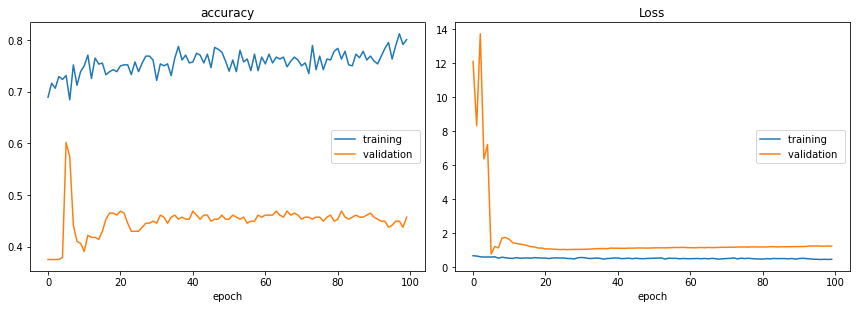

accuracy
	training         	 (min:    0.684, max:    0.812, cur:    0.801)
	validation       	 (min:    0.375, max:    0.602, cur:    0.457)
Loss
	training         	 (min:    0.450, max:    0.673, cur:    0.464)
	validation       	 (min:    0.771, max:   13.718, cur:    1.236)

Epoch 00100: saving model to model_weights.h5
9/9 [==============================] - 1s 129ms/step - loss: 0.4637 - accuracy: 0.8008 - val_loss: 1.2363 - val_accuracy: 0.4570


In [18]:
history = model.fit(x=train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data = validation_generator, validation_steps = validation_steps, callbacks=callbacks)

In [19]:
model_json = model.to_json()
with open("/content/model.json", "w") as json_file:
    json_file.write(model_json)